GROUP NUMBER: 053

Apoorv Kansal

Bike Sharing - Main

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from  xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.tree import DecisionTreeRegressor
import time
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

In [2]:
day_df = pd.read_csv('./day.csv')
hour_df = pd.read_csv('./hour.csv')

In [3]:
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [4]:
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [5]:
print(day_df.isnull().values.any())
print(hour_df.isnull().values.any())

False
False


In [6]:
print(day_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [7]:
print(hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


In [8]:
Day = pd.DataFrame(day_df)
Day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [9]:
Hour = pd.DataFrame(hour_df)
Hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [10]:
day_df[["season", "cnt"]].groupby(['season'], as_index=False).sum().sort_values(by='cnt', ascending=False)

,season,cnt
2,3,1061129
1,2,918589
3,4,841613
0,1,471348


In [11]:
hour_df[["season", "cnt"]].groupby(['season'], as_index=False).sum().sort_values(by='cnt', ascending=False)

,season,cnt
2,3,1061129
1,2,918589
3,4,841613
0,1,471348


In [12]:
day_df[["holiday", "cnt"]].groupby(['holiday'], as_index=False).sum().sort_values(by='cnt', ascending=False)

,holiday,cnt
0,0,3214244
1,1,78435


In [13]:
hour_df[["holiday", "cnt"]].groupby(['holiday'], as_index=False).sum().sort_values(by='cnt', ascending=False)

,holiday,cnt
0,0,3214244
1,1,78435


In [14]:
day_df[["workingday", "cnt"]].groupby(['workingday'], as_index=False).sum().sort_values(by='cnt', ascending=False)

,workingday,cnt
1,1,2292410
0,0,1000269


In [15]:
hour_df[["workingday", "cnt"]].groupby(['workingday'], as_index=False).sum().sort_values(by='cnt', ascending=False)

,workingday,cnt
1,1,2292410
0,0,1000269


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


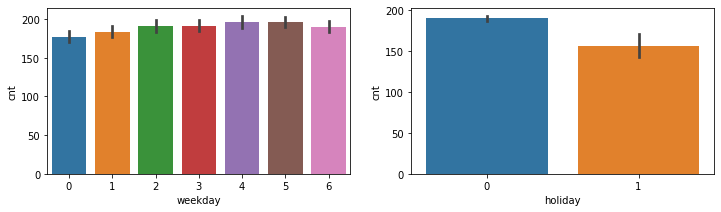

In [16]:
leave_df = hour_df[["weekday","holiday"]]
j = 0
plt.figure(figsize=(25, 25))
for i in leave_df: 
    j=j+1
    plt.subplot(7, 4, j+1)
    sns.barplot(leave_df[i],hour_df["cnt"])
    plt.show

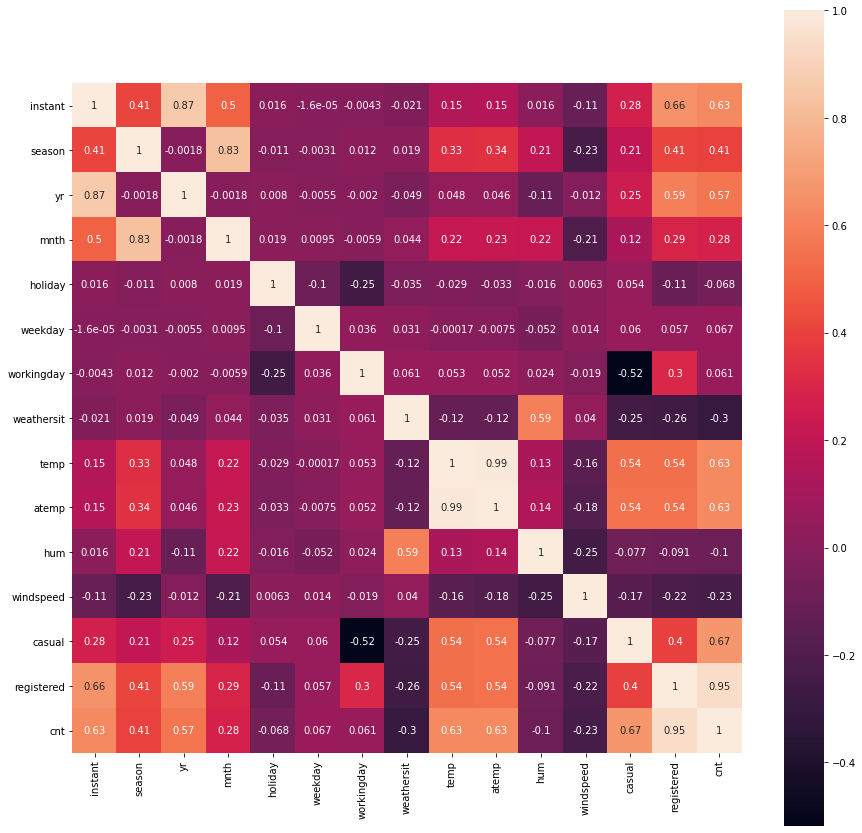

In [17]:
plt.subplots(figsize=(15,15))
sns.heatmap(day_df.corr(), mask=np.zeros_like(day_df.corr(), dtype=bool),
            square=True, annot=True)
plt.show()

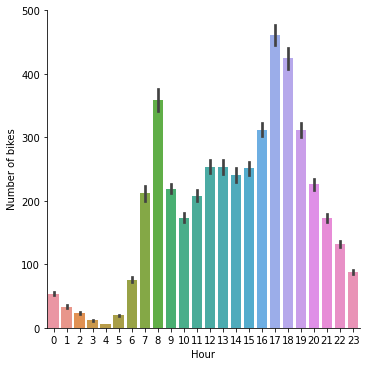

In [18]:
# plt.bar(hour_df['hr'], hour_df['cnt'])

# plt.xlabel('Hour')
# plt.ylabel('Number of bikes')
# plt.show()
sns.catplot(data = hour_df, x = 'hr', y = 'cnt', kind = 'bar')
plt.xlabel('Hour')
plt.ylabel('Number of bikes')
plt.show()

In [19]:
categorical_cols=['season','holiday','workingday','weathersit']
categorical_cols.extend(['mnth','weekday','hr'])

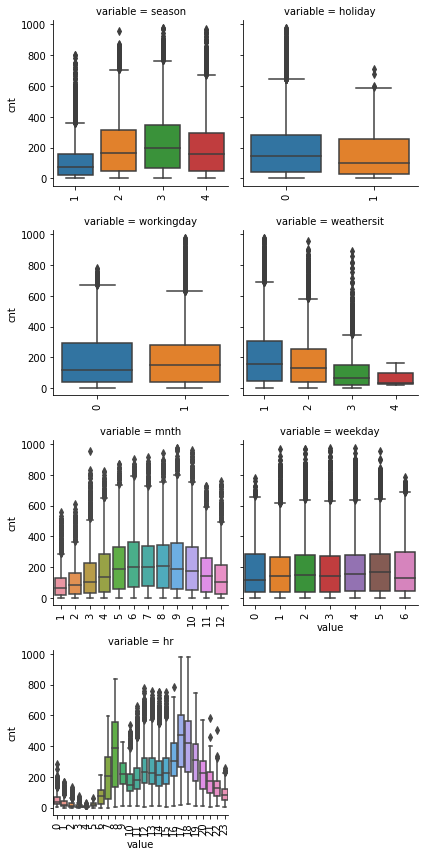

In [20]:
def boxplot(x,y,**kwargs):
    sns.boxplot(x=x,y=y)
    x=plt.xticks(rotation=90)
f=pd.melt(hour_df,id_vars=['cnt'],value_vars=categorical_cols)
g=sns.FacetGrid(f,col='variable',col_wrap=2,sharex=False)
g.map(boxplot,'value','cnt')

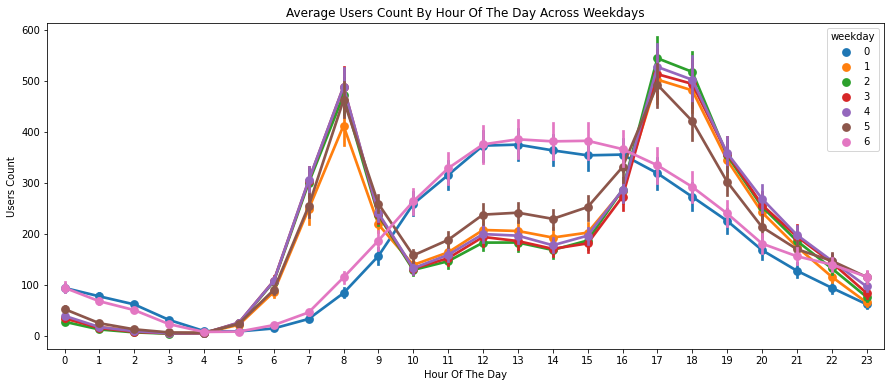

In [21]:
plt.figure(figsize=(15,6))
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
m = sns.pointplot(x=hour_df["hr"], y=hour_df["cnt"],hue=hour_df["weekday"], data=hour_df, join=True)
m.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weekdays",label='big')
plt.show()

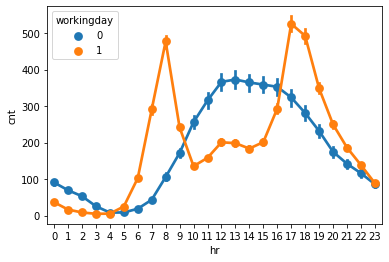

In [22]:
sns.pointplot(x='hr', y='cnt',hue='workingday', data=hour_df)

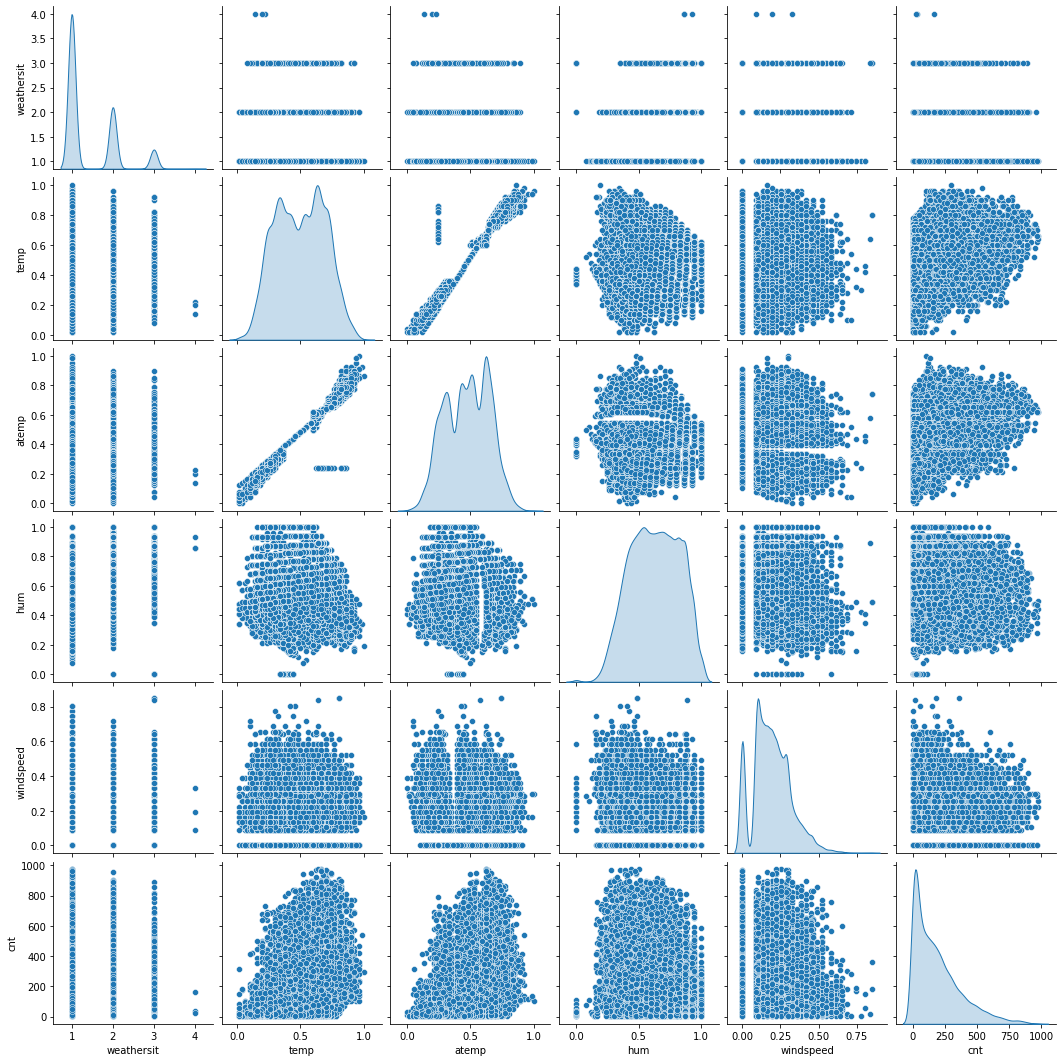

In [23]:
Columns = ['weathersit', 'temp','atemp', 'hum', 'windspeed', 'cnt']
sns.pairplot(hour_df, vars = Columns, diag_kind = 'kde')

Text(0, 0.5, 'Count of all Biks Rented')

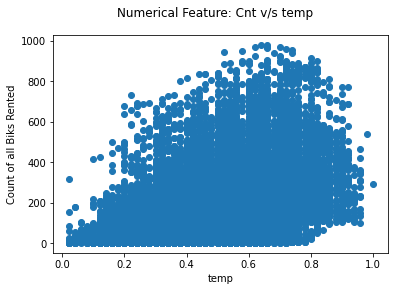

In [24]:
plt.scatter(hour_df['temp'], hour_df['cnt'])
plt.suptitle('Numerical Feature: Cnt v/s temp')
plt.xlabel('temp')
plt.ylabel('Count of all Biks Rented')

Text(0, 0.5, 'Count of all Biks Rented')

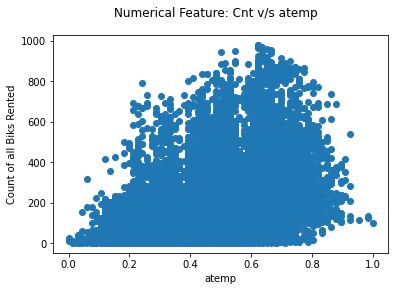

In [25]:
plt.scatter(hour_df['atemp'], hour_df['cnt'])
plt.suptitle('Numerical Feature: Cnt v/s atemp')
plt.xlabel('atemp')
plt.ylabel('Count of all Biks Rented')

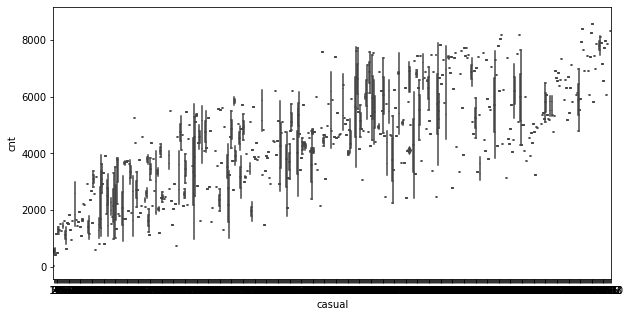

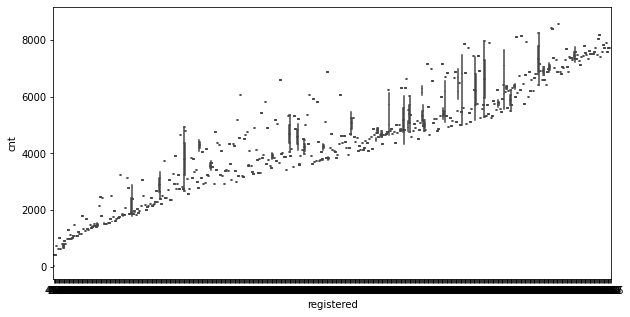

In [26]:
plt.figure(figsize=(10,5))
sns.boxplot(x='casual', y='cnt', data=day_df)

plt.figure(figsize=(10,5))
sns.boxplot(x='registered', y='cnt', data=day_df)

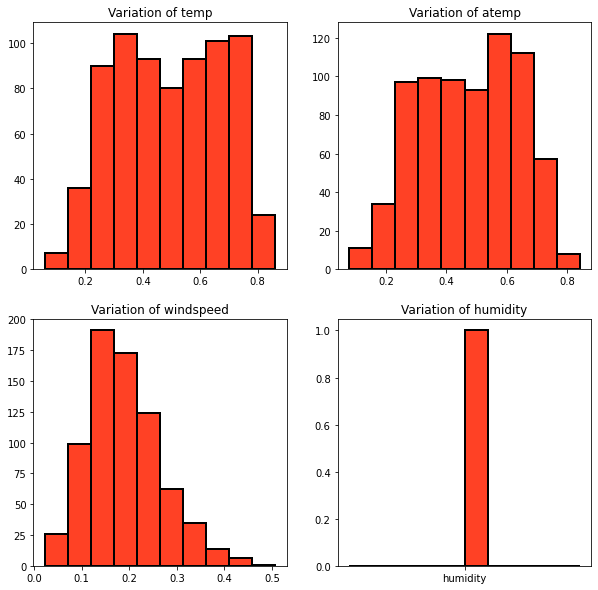

In [27]:
day_df.temp.unique()
fig,axes=plt.subplots(2,2)
axes[0,0].hist(x="temp",data=day_df,edgecolor="black",linewidth=2,color='#ff4125')
axes[0,0].set_title("Variation of temp")
axes[0,1].hist(x="atemp",data=day_df,edgecolor="black",linewidth=2,color='#ff4125')
axes[0,1].set_title("Variation of atemp")
axes[1,0].hist(x="windspeed",data=day_df,edgecolor="black",linewidth=2,color='#ff4125')
axes[1,0].set_title("Variation of windspeed")
axes[1,1].hist(x="humidity",data=day_df,edgecolor="black",linewidth=2,color='#ff4125')
axes[1,1].set_title("Variation of humidity")
fig.set_size_inches(10,10)

In [28]:
hour_df["dteday"] = hour_df["dteday"].astype('datetime64[ns]')
hour_df.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [29]:
hour_df.drop(['dteday'],1,inplace=True)
day_df.drop(['dteday'],1,inplace=True)

In [30]:
x_train,x_test,y_train,y_test=train_test_split(hour_df,hour_df['cnt'],test_size=0.2,random_state=42)

In [31]:
models=[RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),SVR(),KNeighborsRegressor()]
model_names=['RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','SVR','KNeighborsRegressor']
rmsle=[]
datamodel={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    test_pred=clf.predict(x_test)
    rmsle.append(np.sqrt(mean_squared_log_error(test_pred,y_test)))
datamodel={'Modelling Algorithm':model_names,'RMSLE':rmsle}   
datamodel

{'Modelling Algorithm': ['RandomForestRegressor',
  'AdaBoostRegressor',
  'BaggingRegressor',
  'SVR',
  'KNeighborsRegressor'],
 'RMSLE': [0.00032070559389560746,
  0.6451747629707532,
  0.00031987291462522334,
  1.411129924962184,
  0.2368568653511935]}

In [32]:
rmsle_frame=pd.DataFrame(datamodel)
rmsle_frame

,Modelling Algorithm,RMSLE
0,RandomForestRegressor,0.000321
1,AdaBoostRegressor,0.645175
2,BaggingRegressor,0.000320
3,SVR,1.411130
4,KNeighborsRegressor,0.236857


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


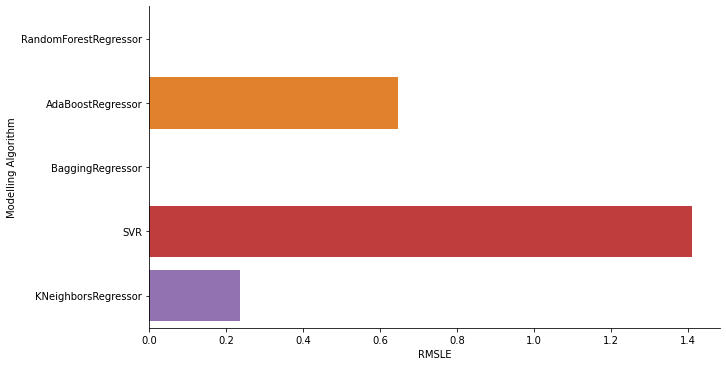

In [33]:
sns.factorplot(y='Modelling Algorithm',x='RMSLE',data=rmsle_frame,kind='bar',size=5,aspect=2)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


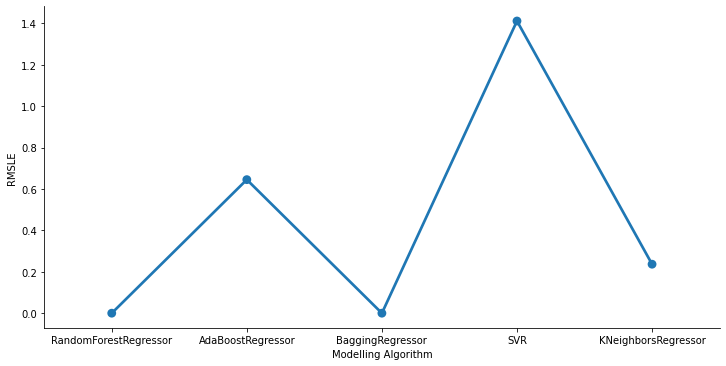

In [34]:
sns.factorplot(x='Modelling Algorithm',y='RMSLE',data=rmsle_frame,kind='point',size=5,aspect=2)

In [ ]:
#for random forest regresion.
no_of_test=[500]
params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,scoring='neg_mean_squared_log_error')
clf_rf.fit(x_train,y_train)
pred=clf_rf.predict(x_test)
print((np.sqrt(mean_squared_log_error(pred,y_test))))

In [ ]:
clf_rf.best_params_

In [ ]:
# for KNN
n_neighbors=[]
for i in range (0,50,5):
    if(i!=0):
        n_neighbors.append(i)
params_dict={'n_neighbors':n_neighbors,'n_jobs':[-1]}
clf_knn=GridSearchCV(estimator=KNeighborsRegressor(),param_grid=params_dict,scoring='neg_mean_squared_log_error')
clf_knn.fit(x_train,y_train)
pred=clf_knn.predict(x_test)
print((np.sqrt(mean_squared_log_error(pred,y_test))))

In [ ]:
clf_knn.best_params_

In [ ]:
y_hr_predicted=clf_rf.predict(hour_df)
submission_hr_df = pd.DataFrame({
        "dateday": Hour["dteday"],
        "hour": Hour["hr"],
        "count": y_hr_predicted
    })
submission_hr_df.to_csv("submission_hr_df.csv", index = False)
submission_hr_df

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(day_df,day_df['cnt'],test_size=0.2,random_state=42)

In [ ]:
from math import sqrt
def RMSLE(y_pred , y_actual):
    n = y_pred.size 
    RMSLE = sqrt(((np.log(y_pred+1)-np.log(y_actual+1))**2).sum()/n)
    return RMSLE

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor


estimators = [("Hist",HistGradientBoostingRegressor(max_depth=9,learning_rate=0.15)),("DT",DecisionTreeRegressor(max_depth=5,random_state=42)),("Linear",Ridge(alpha=0.9)),("Extra",ExtraTreesRegressor(max_depth=15,n_estimators=50, random_state=39)),("ran",RandomForestRegressor( n_estimators=70,max_depth=15, random_state=39))]

reg = StackingRegressor(estimators=estimators,final_estimator=RandomForestRegressor( n_estimators=60,max_depth=9, random_state=42))

reg.fit(X_train , Y_train)
#


y_pred_reg_tr = reg.predict(X_train)
y_pred_reg_ts = reg.predict(X_test)


R_reg= RMSLE(y_pred_reg_ts , Y_test)
R1_reg = RMSLE(y_pred_reg_tr , Y_train)

print("RMSLE of Random Forest Regressor :",R_reg)
print("RMSLE of what model learn :",R1_reg)

In [ ]:
y_day_predicted = reg.predict(day_df)

In [ ]:
submission_day_df = pd.DataFrame({
        "dateday": Day["dteday"],
        "count": y_day_predicted.round()
    })

In [ ]:
submission_day_df.to_csv("submission_day_df.csv", index = False)

In [ ]:
submission_day_df